# NOAA challenge for benchmarking RTS

First you need to create to dataset using the original NOAA dataset with the utiliy function: 

```
python3 noaa/noaa_dot_to_coord.py -img path/to/the/images -dot /path/to/the/dotted/images -out /path/to/the/output/folder
```
The function above, create a .txt file for each image file containing the bounding boxes and class for each sea lion.


```
python3 noaa/noaa_create_model_ds.py -i /path/to/the/images -l /path/to/the/bboxes -o /path/to/the/output/folder -n 10
```

The function above create a dataset of sub images and labels for each images. The labels are the total count of sea lion for each class (adult male, sub adult male, female, ...).



# Model Training

Using the helper function load a model and train it on the newly create dataset.

[INFO] initializing the ResNet50 model...


100%|███████| 50/50 [2:56:37<00:00, 211.96s/epochs, loss=0.104, test_loss=0.102]


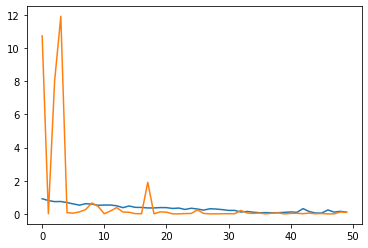

In [2]:
import train_model
import matplotlib.pyplot as plt
TRAIN_PATH = "/PATH/TO/THE/DATASET"
TRAIN_PATH = "/home/remy/Documents/Model/Train"
EPOCHS = 50

DEVICE = 'cuda'

model = train_model.get_model(DEVICE)

history, model = train_model.train(TRAIN_PATH, model, EPOCHS, DEVICE)

plt.plot(history["train_loss"])
plt.plot(history["test_loss"])
plt.show()

# Model Evaluation

Now we can do the evaluation of the model on the validation set.

In [4]:
TRAIN_PATH = "/PATH/TO/THE/DATASET"
TRAIN_PATH = "/media/remy/PHILIPS UFD/Model/Test"

print(train_model.eval(TRAIN_PATH, model, DEVICE))

(0.19231575185602362, array([0.06608255, 0.055263  , 0.06627337, 0.14943645, 0.12020089]))


In [6]:
import torch
torch.save(model, 'noaa_resnet50_weights.pt')

In [34]:
def predict(model, img, device):

    im_pil = Image.fromarray(img)
    preprocess = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    img = preprocess(im_pil).unsqueeze(0).to(device)
    with torch.no_grad():
        pred = model(img).cpu().numpy()[0]
    return pred

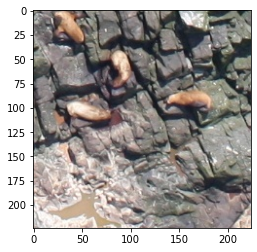

[0 0 0 0 4]


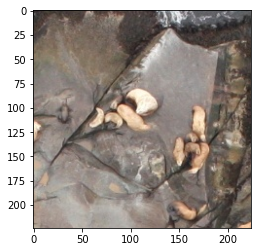

[ 1  1  0 17  4]


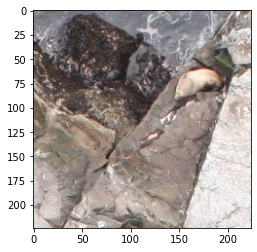

[0 0 0 0 0]


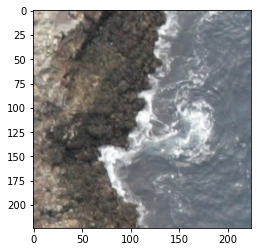

[0 0 0 0 0]


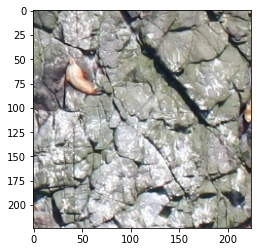

[0 0 0 0 1]


In [41]:
import os
import cv2
from PIL import Image
from torchvision import transforms

img_list = os.listdir("model_test_image")
for img in img_list:
    
    img = cv2.imread(os.path.join("model_test_image", img))

    # You may need to convert the color.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    pred = predict(model, img, DEVICE)
    pred[pred < 0] = 0
    pred = pred.astype(int)
    print(pred)